In [1]:
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style("ticks")

## Compare tip attributes

Count the number of tips present at non-zero frequency in the "no delay" analysis compared to the number of tips with "ideal" and "realistic" delays. Additionally, compare the frequencies of tips that are present in the latter two analyses with the "no delay" analysis.

In [4]:
no_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_no_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [5]:
ideal_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_ideal_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [6]:
realistic_delay_tips = pd.read_csv(
    "../results/builds/simulated/simulated_realistic_delay/tip_attributes.tsv",
    sep="\t",
    parse_dates=["timepoint"],
    usecols=["strain", "timepoint", "frequency"],
)

In [7]:
no_delay_tips.head()

,strain,timepoint,frequency
0,sample_3220_20,2016-10-01,0.00001
1,sample_3220_67,2016-10-01,0.00001
2,sample_3220_69,2016-10-01,0.00001
3,sample_3220_77,2016-10-01,0.00001
4,sample_3220_80,2016-10-01,0.00001


In [8]:
tips = no_delay_tips.merge(
    ideal_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_ideal"],
).merge(
    realistic_delay_tips,
    on=["strain", "timepoint"],
    how="left",
    suffixes=["", "_realistic"],
)  

In [9]:
tips.head(10)

,strain,timepoint,frequency,frequency_ideal,frequency_realistic
0,sample_3220_20,2016-10-01,0.000010,0.000018,0.000042
1,sample_3220_67,2016-10-01,0.000010,0.000018,0.000042
2,sample_3220_69,2016-10-01,0.000010,0.000018,0.000042
3,sample_3220_77,2016-10-01,0.000010,0.000018,0.000042
4,sample_3220_80,2016-10-01,0.000010,0.000018,NaN
5,sample_3224_25,2016-10-01,0.000016,0.000028,0.000066
6,sample_3224_38,2016-10-01,0.000016,0.000028,0.000066
7,sample_3224_67,2016-10-01,0.000016,0.000028,0.000066
8,sample_3224_92,2016-10-01,0.000016,0.000028,NaN
9,sample_3228_12,2016-10-01,0.000024,0.000044,0.000103


In [10]:
total_tips_no_delay = sum(~pd.isnull(tips["frequency"]))

In [11]:
total_tips_no_delay

7840

In [12]:
total_tips_ideal_delay = sum(~pd.isnull(tips["frequency_ideal"]))

In [13]:
total_tips_ideal_delay

6592

In [14]:
total_tips_ideal_delay / total_tips_no_delay

0.8408163265306122

In [15]:
total_tips_realistic_delay = sum(~pd.isnull(tips["frequency_realistic"]))

In [16]:
total_tips_realistic_delay

4659

In [17]:
total_tips_realistic_delay / total_tips_no_delay

0.5942602040816326

In [18]:
tips = tips.fillna(0.0)

In [26]:
max_frequency = tips.loc[:, ["frequency", "frequency_ideal", "frequency_realistic"]].max().max()

In [27]:
max_frequency_threshold = max_frequency + (max_frequency / 10)

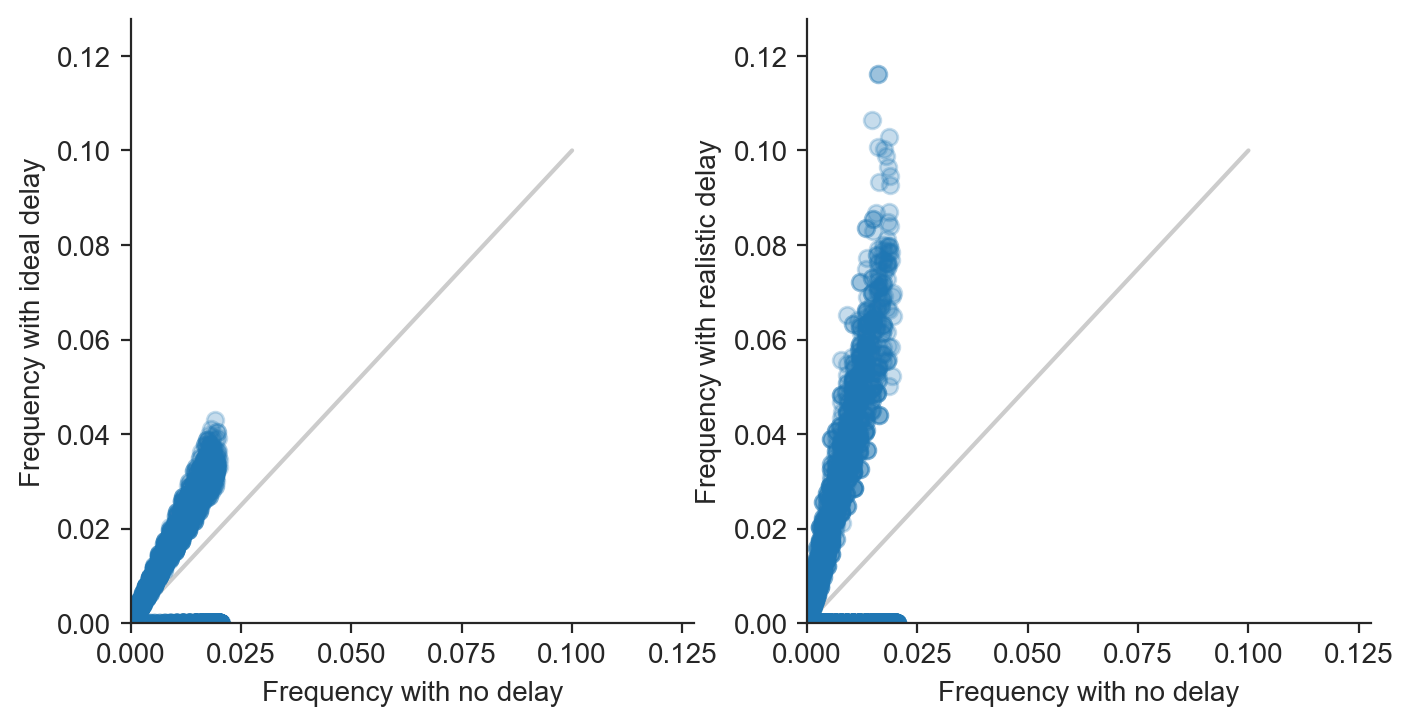

In [30]:
fig, all_axes = plt.subplots(1, 2, figsize=(8, 4), dpi=200)
axes = all_axes.flatten()

axes[0].plot(
    tips["frequency"],
    tips["frequency_ideal"],
    "o",
    alpha=0.25,
)

axes[0].plot(
    np.arange(0, max_frequency_threshold, 0.1),
    np.arange(0, max_frequency_threshold, 0.1),
    color="#CCCCCC",
    zorder=-10,
)
axes[0].set_xlim(0, max_frequency_threshold)
axes[0].set_ylim(0, max_frequency_threshold)

axes[0].set_xlabel("Frequency with no delay")
axes[0].set_ylabel("Frequency with ideal delay")

axes[1].plot(
    tips["frequency"],
    tips["frequency_realistic"],
    "o",
    alpha=0.25,
)

axes[1].plot(
    np.arange(0, max_frequency_threshold, 0.1),
    np.arange(0, max_frequency_threshold, 0.1),
    color="#CCCCCC",
    zorder=-10,
)
axes[1].set_xlim(0, max_frequency_threshold)
axes[1].set_ylim(0, max_frequency_threshold)

axes[1].set_xlabel("Frequency with no delay")
axes[1].set_ylabel("Frequency with realistic delay")

sns.despine()

## Compare distances

Compare the model distances between the estimated and observed future populations when the estimated populations depend on different data delay conditions. We expect that the "no delay" scenario will be closer to the true future on average followed by the "ideal" and then the "realistic" conditions.

In [31]:
distances = pd.read_csv("../results/distance_model_errors.tsv", sep="\t", parse_dates=["validation_timepoint"])

In [32]:
distances = distances.rename(columns={"validation_timepoint": "timepoint"})

In [33]:
sample_to_delay_type = {
    "simulated_no_delay": "none",
    "simulated_ideal_delay": "ideal",
    "simulated_realistic_delay": "realistic",
}

In [34]:
distances["delay_type"] = distances["sample"].map(sample_to_delay_type)

In [88]:
distances.loc[:, ["timepoint", "future_timepoint", "delta_month"]].query("future_timepoint < '2020-10-01'").head(20)

,timepoint,future_timepoint,delta_month
0,2016-10-01,2017-04-01,6
1,2017-04-01,2017-10-01,6
2,2017-10-01,2018-04-01,6
3,2018-04-01,2018-10-01,6
4,2018-10-01,2019-04-01,6
5,2019-04-01,2019-10-01,6
6,2019-10-01,2020-04-01,6
48,2016-10-01,2017-10-01,12
49,2017-04-01,2018-04-01,12
50,2017-10-01,2018-10-01,12


In [35]:
distances

,delta_month,error_type,future_timepoint,null_validation_error,optimal_validation_error,predictors,sample,type,validation_error,validation_n,timepoint,delay_type
0,6,test,2017-04-01,8.748824,3.234646,normalized_fitness,simulated_no_delay,simulated,5.605765,160,2016-10-01,none
1,6,test,2017-10-01,6.346584,3.243099,normalized_fitness,simulated_no_delay,simulated,4.447157,160,2017-04-01,none
2,6,test,2018-04-01,6.228489,3.053271,normalized_fitness,simulated_no_delay,simulated,4.635324,160,2017-10-01,none
3,6,test,2018-10-01,6.103164,3.615312,normalized_fitness,simulated_no_delay,simulated,5.389843,160,2018-04-01,none
4,6,test,2019-04-01,6.432408,3.382116,normalized_fitness,simulated_no_delay,simulated,4.854461,160,2018-10-01,none
...,...,...,...,...,...,...,...,...,...,...,...,...
280,12,test,2038-10-01,7.776063,5.156313,normalized_fitness,simulated_ideal_delay,simulated,7.017979,134,2037-10-01,ideal
281,12,test,2039-04-01,6.359608,4.358462,normalized_fitness,simulated_ideal_delay,simulated,5.610270,143,2038-04-01,ideal
282,12,test,2039-10-01,8.695245,5.559591,normalized_fitness,simulated_ideal_delay,simulated,7.822222,140,2038-10-01,ideal
283,12,test,2040-04-01,11.632553,7.358765,normalized_fitness,simulated_ideal_delay,simulated,10.308254,142,2039-04-01,ideal


In [36]:
distances.loc[:, ["timepoint", "delta_month", "sample", "validation_error"]]

,timepoint,delta_month,sample,validation_error
0,2016-10-01,6,simulated_no_delay,5.605765
1,2017-04-01,6,simulated_no_delay,4.447157
2,2017-10-01,6,simulated_no_delay,4.635324
3,2018-04-01,6,simulated_no_delay,5.389843
4,2018-10-01,6,simulated_no_delay,4.854461
...,...,...,...,...
280,2037-10-01,12,simulated_ideal_delay,7.017979
281,2038-04-01,12,simulated_ideal_delay,5.610270
282,2038-10-01,12,simulated_ideal_delay,7.822222
283,2039-04-01,12,simulated_ideal_delay,10.308254


In [37]:
distances.groupby(["delay_type", "delta_month"])["validation_error"].mean()

delay_type  delta_month
ideal       6              6.100596
            12             7.724131
none        6              5.547106
            12             7.048394
realistic   6              6.698767
            12             8.257378
Name: validation_error, dtype: float64

In [38]:
distances.groupby(["delay_type", "delta_month"])["validation_error"].median().sort_values()

delay_type  delta_month
none        6              5.150356
ideal       6              5.886647
realistic   6              6.471332
none        12             6.611808
ideal       12             7.534036
realistic   12             8.332733
Name: validation_error, dtype: float64

In [39]:
# Only reducing forecast horizon from 12 to 6 months
8.332733 - 6.471332

1.861400999999999

In [40]:
# Only reducing submission delay
8.332733 - 7.534036

0.7986969999999989

In [41]:
# Sum of effects
(8.332733 - 6.471332) + (8.332733 - 7.534036)

2.660097999999998

In [42]:
# Reducing forecast horizon and submission delay
8.332733 - 5.886647

2.4460859999999993

In [64]:
distances.query("timepoint == '2016-10-01'").loc[:, ["delta_month", "delay_type", "validation_error"]]

,delta_month,delay_type,validation_error
0,6,none,5.605765
48,12,none,6.437366
95,6,realistic,7.801962
143,12,realistic,10.396828
190,6,ideal,6.115540
238,12,ideal,8.405408


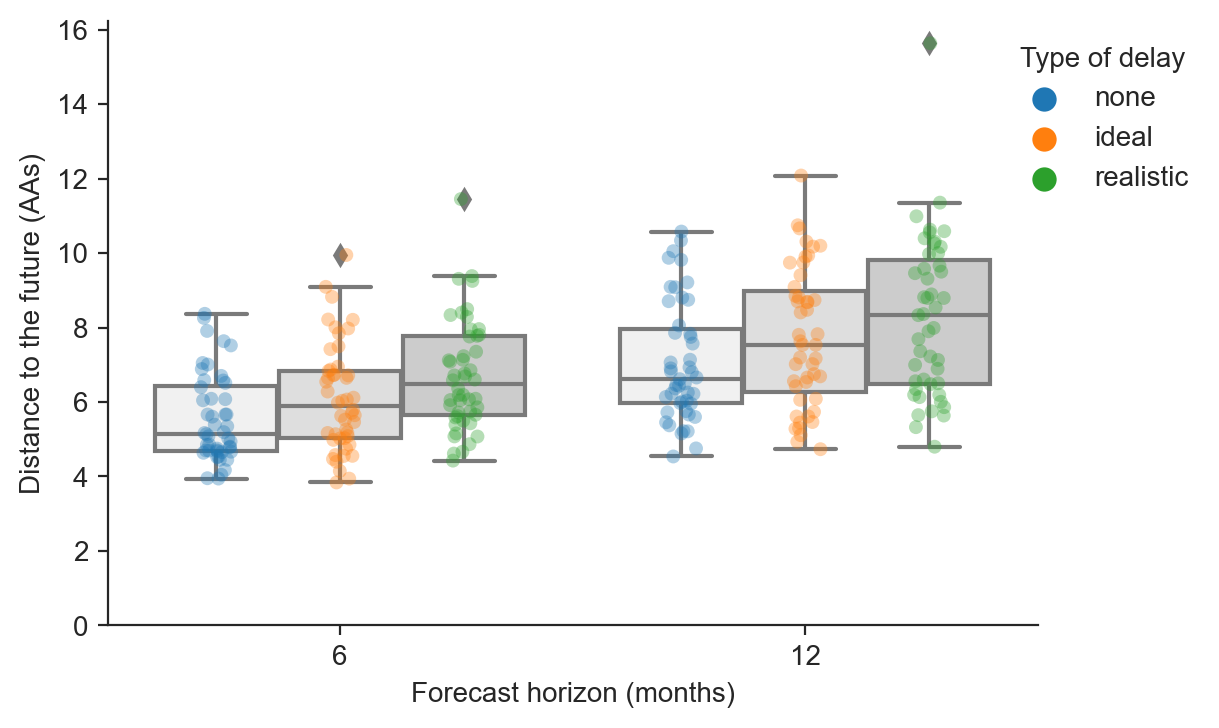

In [124]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)
sns.boxplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    hue_order=("none", "ideal", "realistic"),
    data=distances,
    color="#CCCCCC",
    ax=ax,
)
sns.stripplot(
    x="delta_month",
    y="validation_error",
    hue="delay_type",
    data=distances,
    hue_order=("none", "ideal", "realistic"),
    alpha=0.35,
    ax=ax,
    dodge=True,
)

ax.set_ylim(bottom=0)

handles, labels = ax.get_legend_handles_labels()

ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=labels[3:],
    loc="upper left",
    title="Type of delay",
    frameon=False,
)
ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Distance to the future (AAs)")

sns.despine()

### Relative distances per timepoint

In [45]:
distances.head()

,delta_month,error_type,future_timepoint,null_validation_error,optimal_validation_error,predictors,sample,type,validation_error,validation_n,timepoint,delay_type
0,6,test,2017-04-01,8.748824,3.234646,normalized_fitness,simulated_no_delay,simulated,5.605765,160,2016-10-01,none
1,6,test,2017-10-01,6.346584,3.243099,normalized_fitness,simulated_no_delay,simulated,4.447157,160,2017-04-01,none
2,6,test,2018-04-01,6.228489,3.053271,normalized_fitness,simulated_no_delay,simulated,4.635324,160,2017-10-01,none
3,6,test,2018-10-01,6.103164,3.615312,normalized_fitness,simulated_no_delay,simulated,5.389843,160,2018-04-01,none
4,6,test,2019-04-01,6.432408,3.382116,normalized_fitness,simulated_no_delay,simulated,4.854461,160,2018-10-01,none


In [89]:
distances_per_timepoint = distances.loc[:, ["future_timepoint", "delay_type", "delta_month", "validation_error"]].pivot_table(
    values="validation_error",
    index=["future_timepoint", "delta_month"],
    columns=["delay_type"],
).reset_index()

In [90]:
distances_per_timepoint.head()

delay_type,future_timepoint,delta_month,ideal,none,realistic
0,2017-04-01,6,6.115540,5.605765,7.801962
1,2017-10-01,6,4.468616,4.447157,5.390249
2,2017-10-01,12,8.405408,6.437366,10.396828
3,2018-04-01,6,5.083742,4.635324,5.715635
4,2018-04-01,12,4.730829,4.752487,5.323455


In [91]:
best_case_distances_per_timepoint = distances_per_timepoint.query(
    "(delta_month == 6)"
).loc[
    :, 
    ["future_timepoint", "none"]
].rename(
    columns={"none": "best_case"}
)

In [123]:
best_case_distances_per_timepoint.head()

delay_type,future_timepoint,best_case
0,2017-04-01,5.605765
1,2017-10-01,4.447157
3,2018-04-01,4.635324
5,2018-10-01,5.389843
7,2019-04-01,4.854461


In [94]:
distances_per_timepoint_with_best_case = distances_per_timepoint.merge(
    best_case_distances_per_timepoint,
    on="future_timepoint",
    how="inner",
)

In [95]:
distances_per_timepoint_with_best_case.head()

delay_type,future_timepoint,delta_month,ideal,none,realistic,best_case
0,2017-04-01,6,6.115540,5.605765,7.801962,5.605765
1,2017-10-01,6,4.468616,4.447157,5.390249,4.447157
2,2017-10-01,12,8.405408,6.437366,10.396828,4.447157
3,2018-04-01,6,5.083742,4.635324,5.715635,4.635324
4,2018-04-01,12,4.730829,4.752487,5.323455,4.635324


In [100]:
distances_per_timepoint_with_best_case["relative_none"] = (
    distances_per_timepoint_with_best_case["none"] - distances_per_timepoint_with_best_case["best_case"]
)

In [98]:
distances_per_timepoint_with_best_case["relative_ideal"] = (
    distances_per_timepoint_with_best_case["ideal"] - distances_per_timepoint_with_best_case["best_case"]
)

In [99]:
distances_per_timepoint_with_best_case["relative_realistic"] = (
    distances_per_timepoint_with_best_case["realistic"] - distances_per_timepoint_with_best_case["best_case"]
)

In [101]:
distances_per_timepoint_with_best_case.head()

delay_type,future_timepoint,delta_month,ideal,none,realistic,best_case,relative_ideal,relative_realistic,relative_none
0,2017-04-01,6,6.115540,5.605765,7.801962,5.605765,0.509775,2.196197,0.000000
1,2017-10-01,6,4.468616,4.447157,5.390249,4.447157,0.021459,0.943091,0.000000
2,2017-10-01,12,8.405408,6.437366,10.396828,4.447157,3.958251,5.949670,1.990209
3,2018-04-01,6,5.083742,4.635324,5.715635,4.635324,0.448418,1.080311,0.000000
4,2018-04-01,12,4.730829,4.752487,5.323455,4.635324,0.095505,0.688131,0.117163


In [103]:
distances_relative_to_no_delay = distances_per_timepoint_with_best_case.melt(
    id_vars=["future_timepoint", "delta_month"],
    value_vars=["relative_none", "relative_ideal", "relative_realistic"],
    var_name="delay_type",
    value_name="relative_distance",
)

In [104]:
distances_relative_to_no_delay.head()

,future_timepoint,delta_month,delay_type,relative_distance
0,2017-04-01,6,relative_none,0.000000
1,2017-10-01,6,relative_none,0.000000
2,2017-10-01,12,relative_none,1.990209
3,2018-04-01,6,relative_none,0.000000
4,2018-04-01,12,relative_none,0.117163


In [121]:
distances_relative_to_no_delay.groupby([
    "delta_month",
    "delay_type"
])["relative_distance"].aggregate([
    "median",
    "mean",
    "std",
]).sort_values("median")

median      mean       std
delta_month delay_type                                      
6           relative_none       0.000000  0.000000  0.000000
            relative_ideal      0.329200  0.553490  0.803550
            relative_realistic  1.064902  1.151661  1.111093
12          relative_none       1.312502  1.502536  1.745209
            relative_ideal      1.994370  2.178272  1.953861
            relative_realistic  2.465317  2.711520  2.295551

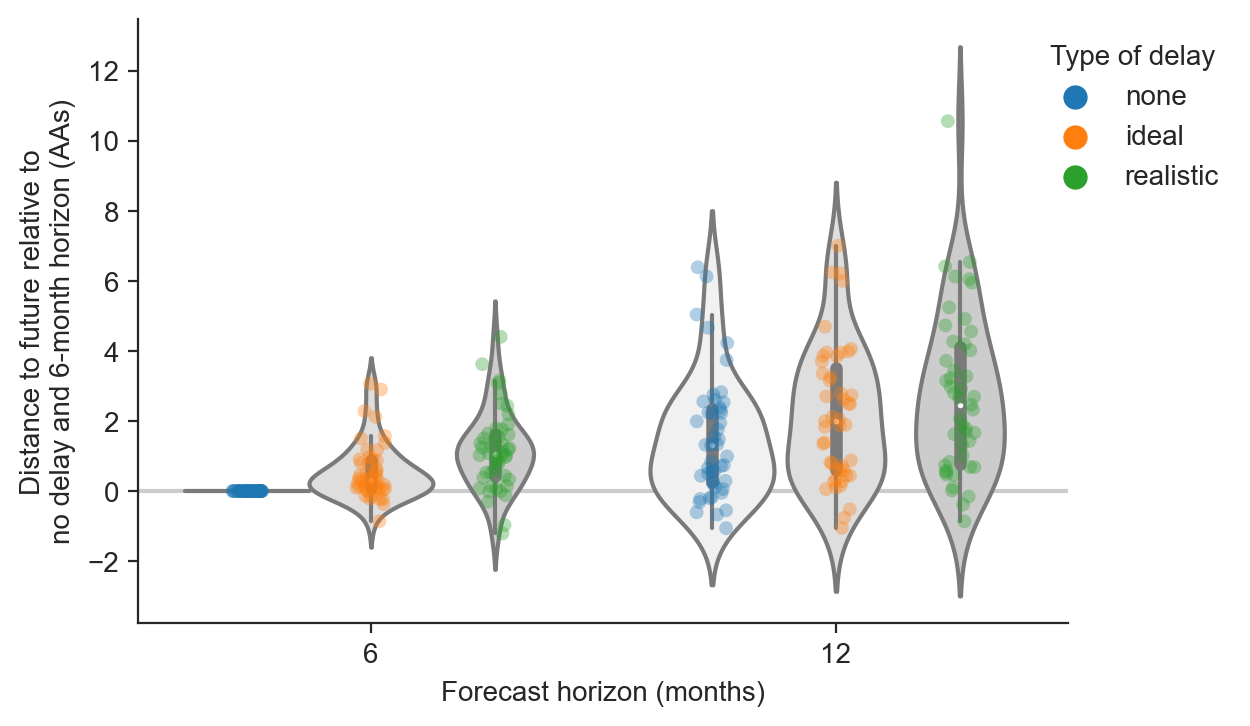

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(6, 4), dpi=200)

sns.violinplot(
    x="delta_month",
    y="relative_distance",
    hue="delay_type",
    data=distances_relative_to_no_delay,
    hue_order=("relative_none", "relative_ideal", "relative_realistic",),
    ax=ax,
    color="#CCCCCC",
)

sns.stripplot(
    x="delta_month",
    y="relative_distance",
    hue="delay_type",
    data=distances_relative_to_no_delay,
    hue_order=("relative_none", "relative_ideal", "relative_realistic",),
    ax=ax,
    alpha=0.35,
    dodge=True,
)

ax.axhline(y=0.0, color="#CCCCCC", zorder=-10)

handles, labels = ax.get_legend_handles_labels()
new_labels = ["none", "ideal", "realistic"]
ax.legend(
    bbox_to_anchor=(0.95, 1),
    handles=handles[3:],
    labels=new_labels,
    loc="upper left",
    title="Type of delay",
    frameon=False,
)

ax.set_xlabel("Forecast horizon (months)")
ax.set_ylabel("Distance to future relative to\nno delay and 6-month horizon (AAs)")

sns.despine()